In [ ]:
import keras
keras.__version__

# A first look at a neural network

This notebook contains the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify 
hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this 
first example right away. You probably haven't even installed Keras yet. Don't worry, that is perfectly fine. In the next chapter, we will 
review each element in our example and explain them in detail. So don't worry if some steps seem arbitrary or look like magic to you! 
We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

The exact purpose of the loss function and the optimizer will be made clear throughout the next two chapters.

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels, a step which we explain in chapter 3:

In [12]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s - loss: 0.2577 - acc: 0.9245     
Epoch 2/5
60000/60000 [==============================] - 1s - loss: 0.1042 - acc: 0.9690     
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 0.0687 - acc: 0.9793     
Epoch 4/5
60000/60000 [==============================] - 1s - loss: 0.0508 - acc: 0.9848     
Epoch 5/5
60000/60000 [==============================] - 1s - loss: 0.0382 - acc: 0.9890     


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

 9536/10000 [===========================>..] - ETA: 0s

In [15]:
print('test_acc:', test_acc)

test_acc: 0.9777



Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 
Overfitting will be a central topic in chapter 3.

This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in 
less than 20 lines of Python code. In the next chapter, we will go in detail over every moving piece we just previewed, and clarify what is really 
going on behind the scenes. You will learn about "tensors", the data-storing objects going into the network, about tensor operations, which 
layers are made of, and about gradient descent, which allows our network to learn from its training examples.

Chapter 2 : Before we begin: the mathematical building blocks of neural networks
Scalars  : 0  dimensional

Vectors: 1D

Matrices : 2D

Tensors  : 3 D

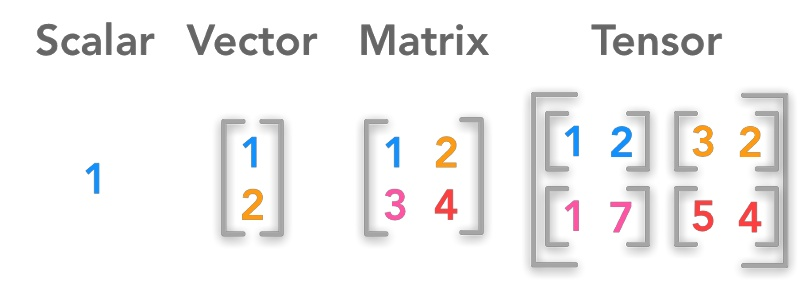

In [2]:
from IPython.display import Image, display
Image('./image/download.jpg')



A tensor is defined by three key attributes:
1- Number of axes (rank)—For instance, a 3D tensor has three axes, and a matrix has
two axes. This is also called the tensor’s ndim in Python libraries such as Numpy.

2- Shape

3- Data Type

**Real-world examples of data tensors:**

●Vector data—2D tensors of shape (samples, features)

●Time Series data or sequence data—3D tensors of shape (samples, timesteps, features)

●Images—4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)

●Video—5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

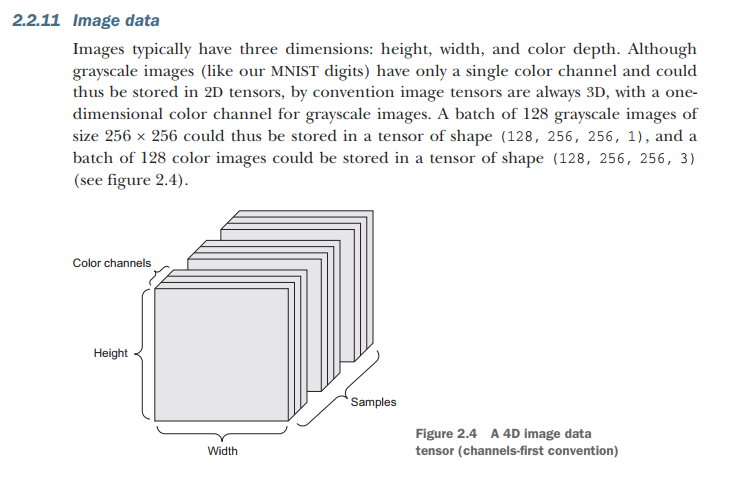

In [2]:
from IPython.display import *
Image(filename="./image/Picture1.png")

# The engine of neural networks  

output = relu(dot(W, input) + b)  

In this expression, W and b are tensors that are attributes of the layer. They’re called the weights or trainable parameters of the layer (the kernel and bias attributes, respectively). These weights contain the information learned by the network from exposure to training data. 

Initially, these weight matrices are filled with small random values (a step called random initialization). Of course, there’s no reason to expect that relu(dot(W, input) + b),
when W and b are random, will yield any useful representations.


Repeat these steps in a loop, as long as necessary:
1. Draw a batch of training samples x and corresponding targets y.
2. Run the network on x (a step called the forward pass) to obtain predictions y_pred.
3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.
4. Update all weights of the network in a way that slightly reduces the loss on this batch.

You’ll eventually end up with a network that has a very low loss on its training data: a low mismatch between predictions y_pred and expected targets y.
 One naive solution would be to freeze all weights in the network except the one scalar coefficient being considered, and try different values for this coefficient.


**What’s a derivative?**
Consider a continuous, smooth function f(x) = y, mapping a real number x to a new real number y. Because the function is continuous, a small change in x can only result in a small change in y—that’s the intuition behind continuity. Let’s say you increase x by a small factor epsilon_x: this results in a small epsilon_y change to y:

**f(x + epsilon_x) = y + epsilon_y**

In addition, because the function is smooth (its curve doesn’t have any abrupt angles),
when epsilon_x is small enough, around a certain point p, it’s possible to approximate f as a linear function of slope a, so that epsilon_y becomes a * epsilon_x:

**f(x + epsilon_x) = y + a * epsilon_x**
Obviously, this linear approximation is valid only when x is close enough to p.
The slope a is called the derivative of f in p. If a is negative, it means a small change
of x around p will result in a decrease of f(x) (as shown in figure 2.10); and if a is positive, a small change in x will result in an increase of f(x).

Further, the absolute value of a (the magnitude of the derivative) tells you how quickly this increase or decrease) will happen.

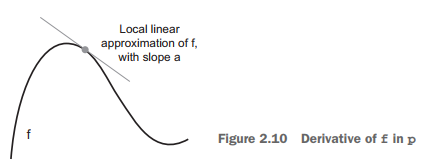

In [3]:
from IPython.display import *
Image(filename="./image/Picture2.png")

For every differentiable function f(x) (differentiable means “can be derived”: for example, smooth, continuous functions can be derived), there exists a derivative function

f'(x) that maps values of x to the slope of the local linear approximation of f in those points. For instance, the derivative of cos(x) is -sin(x), the derivative of f(x) = a * x
is f'(x)’ = a, and so on.

If you’re trying to update x by a factor epsilon_x in order to minimize f(x), and you know the derivative of f, then your job is done: the derivative completely describes how f(x) evolves as you change x. If you want to reduce the value of f(x),
you just need to move x a little in the opposite direction from the derivative

**Stochastic gradient descent  :**
If you update the weights in the opposite direction from the gradient, the loss will be a little less every time:
1. Draw a batch of training samples x and corresponding targets y.
2. Run the network on x to obtain predictions y_pred.
3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.
4. Compute the gradient of the loss with regard to the network’s parameters (a backward pass).
5. Move the parameters a little in the opposite direction from the gradient—for example W -= step * gradient—thus reducing the loss on the batch a bit.

Figure 2.11 illustrates what happens in 1D, when the network has only one parameter and you have only one training sample.


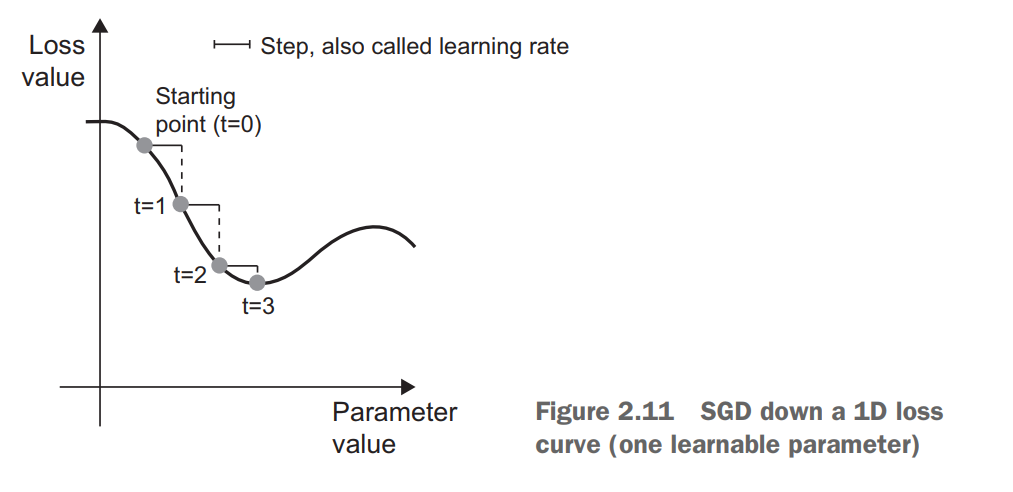

In [4]:
from IPython.display import *
Image(filename="./image/Picture3.png")

How to select step factor on Stochastic gradient descent:
If it’s too small, the descent down the curve will take many iterations, and it could get stuck in a local minimum. If step is too large, your updates may end up taking you to completely random locations on the curve.
you could run every step on all data available, which is called batch SGD  .

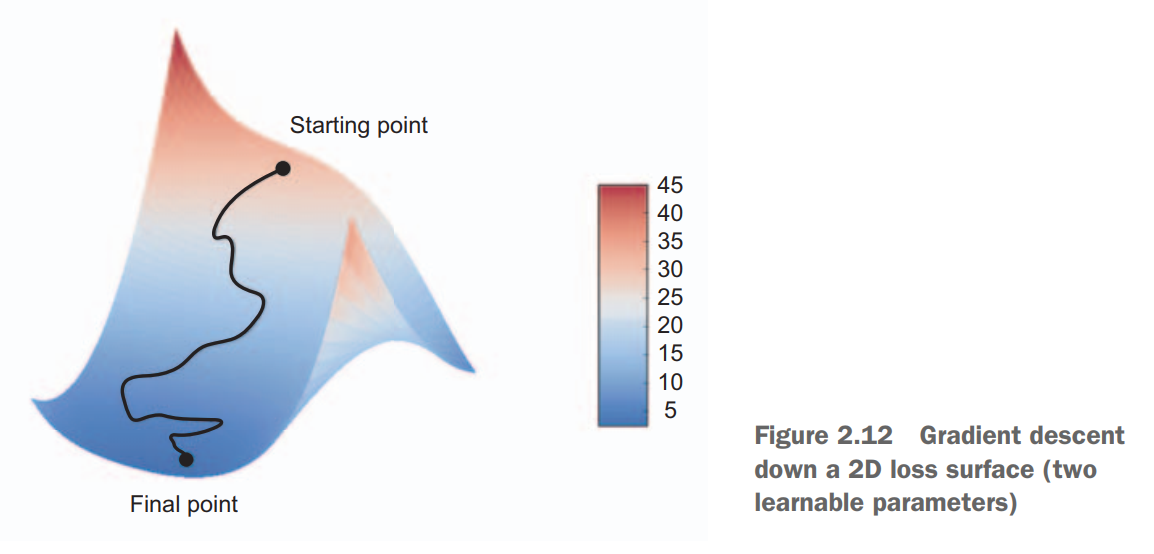

In [6]:
Image(filename="./image/Picture4.png")

Momentum addresses two issues with SGD: convergence speed and local minim.

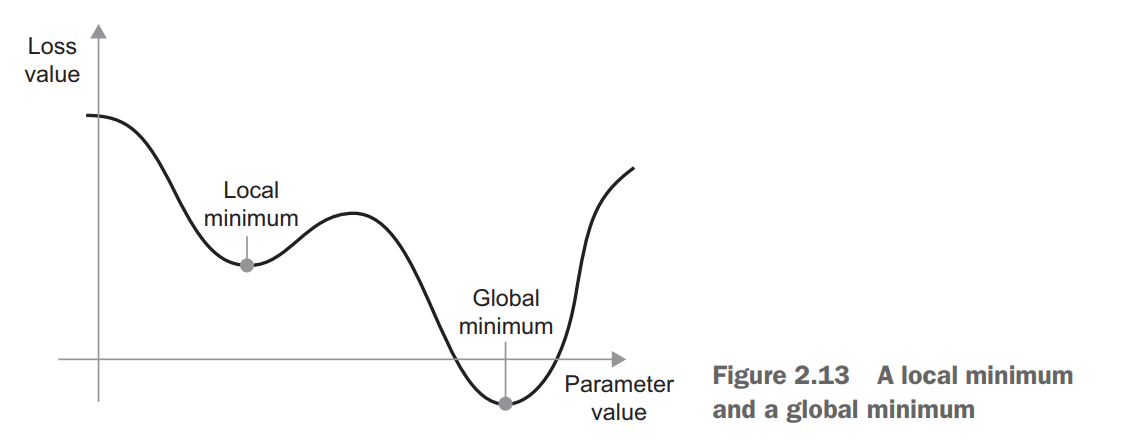

In [7]:
Image(filename="./image/Picture5.png")

In the previous algorithm, we casually assumed that because a function is differentiable, we can explicitly compute its derivative. In practice, a neural network function consists of many tensor operations chained together, each of which has a simple, known derivative. For instance, this is a network f composed of three tensor operations, a, b, and c, with weight matrices W1, W2, and W3:

`f(W1, W2, W3) = a(W1, b(W2, c(W3)))`
Calculus tells us that such a chain of functions can be derived using the following identity, called the chain rule: `f(g(x)) = f'(g(x)) * g'(x)`. 

Applying the chain rule to the computation of the gradient values of a neural network gives rise to an algorithm called Backpropagation (also sometimes called reverse-mode differentiation). Backpropagation starts with the final loss value and works backward from the top layers to the bottom layers, applying the chain rule to compute the contribution that each parameter had in the loss value.

# Summary

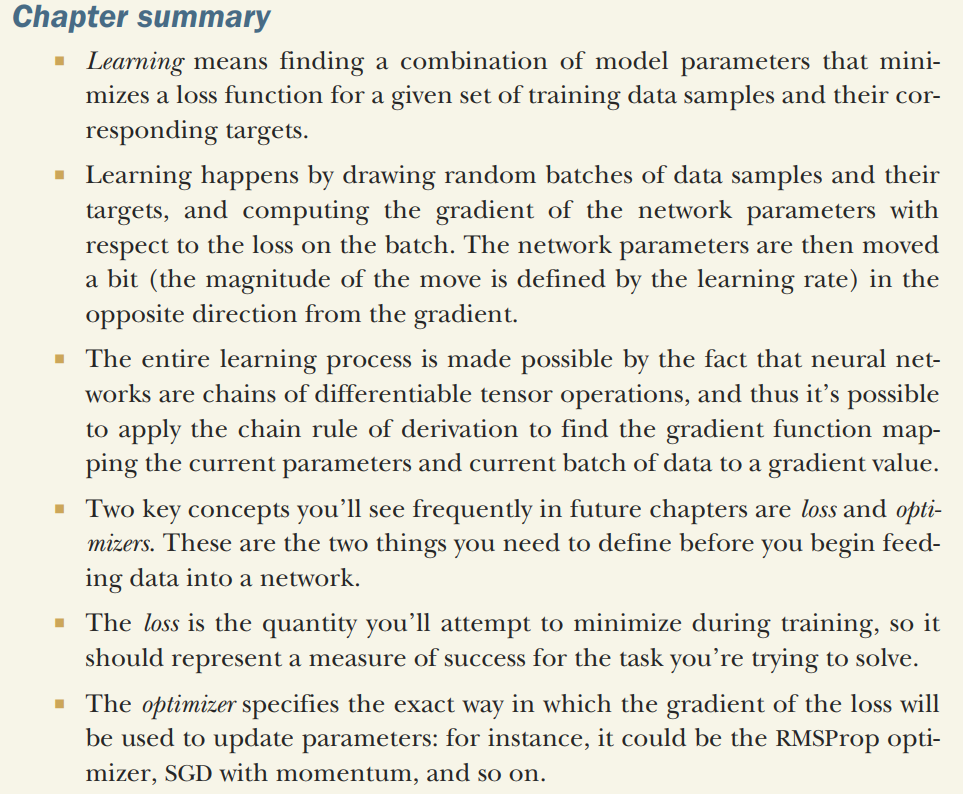

In [8]:
Image(filename='./image/Picture6.png')